## Emotion Histogram

In [59]:
import os
import re
import glob
import numpy as np
from collections import namedtuple, defaultdict
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import nltk
import en_core_web_sm
import fr_core_news_sm
import docx

import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
nlp_fr = fr_core_news_sm.load()

In [60]:
Paths=[]


for file in glob.glob("./newdir/*.txt"):
    Paths.append(file)
    
print(Paths)

['./newdir/277.txt', './newdir/278.txt', './newdir/71.txt', './newdir/527.txt', './newdir/118.txt', './newdir/93.txt', './newdir/90.txt', './newdir/747.txt', './newdir/454.txt', './newdir/116.txt', './newdir/524.txt', './newdir/67.txt', './newdir/7.txt', './newdir/175.txt', './newdir/739.txt', './newdir/15.txt', './newdir/72.txt', './newdir/257.txt', './newdir/696.txt', './newdir/51..txt', './newdir/57.txt', './newdir/283.txt', './newdir/531.txt', './newdir/105.txt', './newdir/210.txt', './newdir/505.txt', './newdir/446.txt', './newdir/148.txt', './newdir/821.txt', './newdir/32.txt', './newdir/128.txt', './newdir/107.txt', './newdir/793.txt', './newdir/66.txt', './newdir/159.txt', './newdir/157.txt', './newdir/732.txt', './newdir/674.txt', './newdir/534.txt', './newdir/88.txt', './newdir/76.txt', './newdir/28.txt', './newdir/59.txt', './newdir/133.txt', './newdir/99.txt', './newdir/207.txt', './newdir/78.txt', './newdir/182.txt', './newdir/185.txt', './newdir/225.txt', './newdir/45.txt

In [4]:
l_corpus = []
#doc = pd.read_csv(path, delimiter='\t', encoding='cp1252')

In [5]:
All_words=[]
for path in Paths:
    #print(path)
    f=open(path,encoding='gbk')
    temp=[]
    line=f.readline()
    while line:
        temp+=line
        line=f.readline()
    f.close
    str=""
    temp=str.join(temp)
    All_words.append(temp)

In [6]:
print(np.array(All_words).shape)

(52,)


In [7]:
a=[]
a.append(Paths[0])
print(a)

['./newdir/182 retranscription.txt']


In [8]:
affects = pd.read_csv('NRC-AffectIntensity-Lexicon-fr.txt', sep='\t')
affect_terms = set(affects['term'])

In [9]:
print(All_words[2])

ASSI n°107
Nom de la personne qui retranscrit : 
Cécile Fouquiau

Date de l'entretien :
13 novembre 2008

Date de la retranscription :
19 novembre 2009

Sexe du patient :
? Homme                       ? Femme
                    
Est-il /elle issu(e) d'une famille monoparentale :
? oui                               ? non
             

Donc, pour commencer j'aimerais que tu me présentes ta situation familiale durant l'enfance.
Heu, bah mes parents sont pas divorcés.
Mmm
 J'ai un frère que j'aime, mes deux parents, on habite ensemble dans la maison. Il n'y a jamais eu de ...de (mésintenttion), je...j'ai toujours été super proche de mes parents. Il ya eu, je parle très jeune, même si dans l'adolescence suivie d'une période de tension, comme tout le monde, la crise d'adolescence et tout... Mais ?a n'a jamais été très très grave. Quand t'es jeune...une espèce de petite famille parfaite comme dans dans les films, on parle de (?) de voyage, une petite maison en banlieue... On a toujours beau

In [11]:
m=0
list_anger,list_fear,list_joy,list_sadness=[],[],[],[]

for person in All_words:
    utterance = nlp_fr(person)
    ut_affects = defaultdict(list)
    for word in utterance:
        term=word.lemma_.lower()
        if term in affect_terms:
            df_term = affects.loc[affects.loc[:, 'term'] == term, :]
            for j in df_term.index:
                ut_affects[df_term.loc[j, 'AffectDimension']].append((term, df_term.loc[j, 'score']))
    
    list_anger.append([Paths[m],ut_affects["anger"]])
    list_fear.append([Paths[m],ut_affects["fear"]])
    list_joy.append([Paths[m],ut_affects["joy"]])
    list_sadness.append([Paths[m],ut_affects["sadness"]])
    m=m+1
    
    

In [26]:
print(np.array(list_anger).shape)
print(list_anger[0][1][1][1])

(52, 2)
0.359


In [43]:
score_joy,score_anger,score_fear,score_sadness=[],[],[],[]
temp_sum_joy,temp_sum_anger,temp_sum_fear,temp_sum_sadness=0,0,0,0
temp_ave_joy,temp_ave_anger,temp_ave_fear,temp_ave_sadness=0,0,0,0
for i in range(np.array(list_anger).shape[0]):
    for j in range(np.array(list_anger[i][1]).shape[0]):
        temp_sum_anger+=list_anger[i][1][j][1]
    temp_ave_anger=temp_sum_anger/j
    
    
    for j in range(np.array(list_joy[i][1]).shape[0]):
        temp_sum_joy+=list_joy[i][1][j][1]
    temp_ave_joy=temp_sum_joy/j
    
    
    for j in range(np.array(list_fear[i][1]).shape[0]):
        temp_sum_fear+=list_fear[i][1][j][1]
    temp_ave_fear=temp_sum_fear/j
    
    
    for j in range(np.array(list_sadness[i][1]).shape[0]):
        temp_sum_sadness+=list_sadness[i][1][j][1]
    temp_ave_sadness=temp_sum_sadness/j
    
    
    score_anger.append([Paths[i],temp_sum_anger,temp_ave_anger])
    score_joy.append([Paths[i],temp_sum_joy,temp_ave_joy])
    score_fear.append([Paths[i],temp_sum_fear,temp_ave_fear])
    score_sadness.append([Paths[i],temp_sum_sadness,temp_ave_sadness])  
    
    temp_sum_anger=0
    temp_sum_joy=0
    temp_sum_fear=0
    temp_sum_sadness=0

In [44]:
print(score_joy[1][1],score_anger[1][1],score_fear[1][1],score_sadness[1][1])

178.92200000000008 64.73999999999998 79.53500000000001 99.245


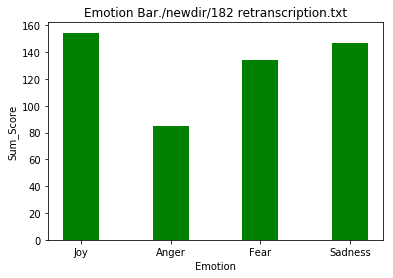

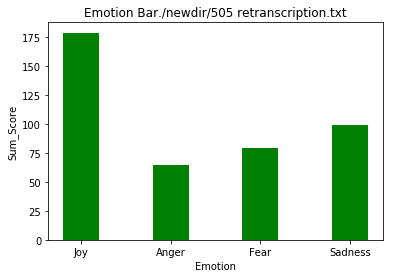

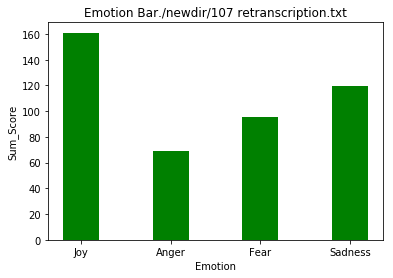

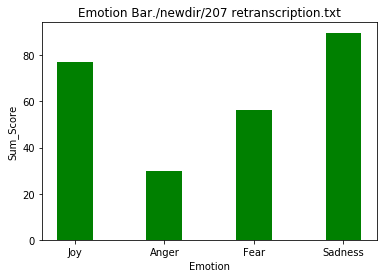

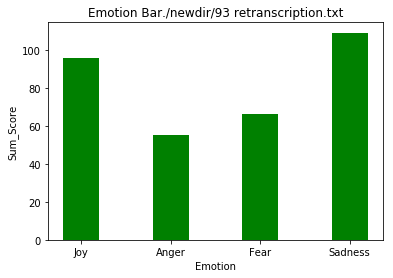

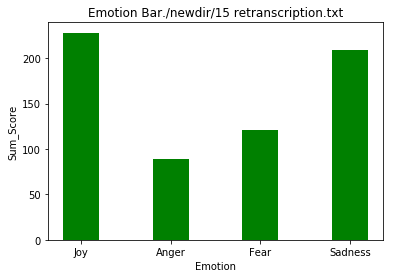

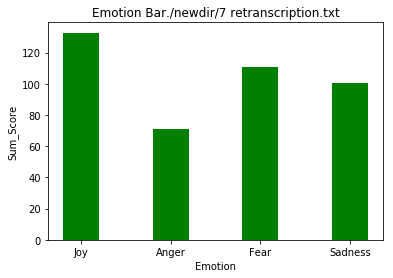

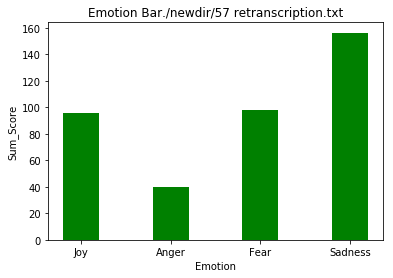

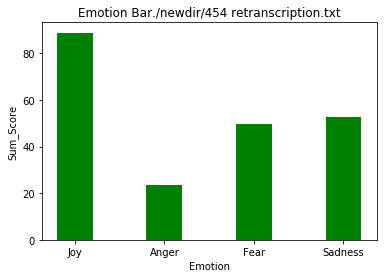

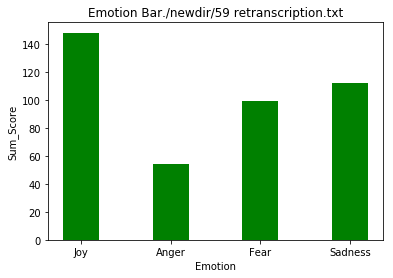

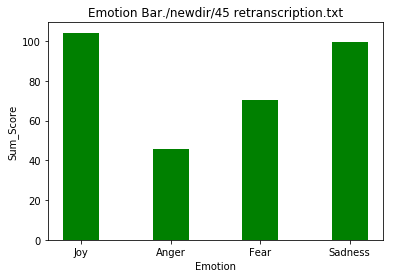

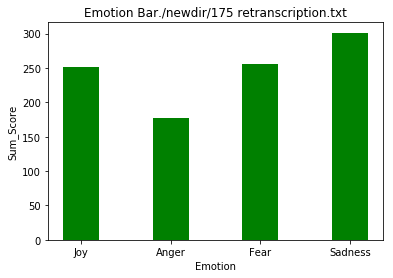

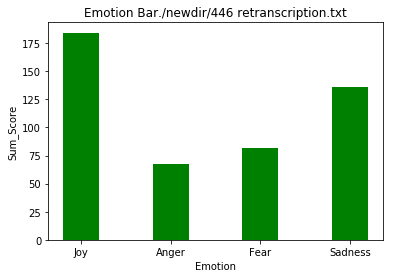

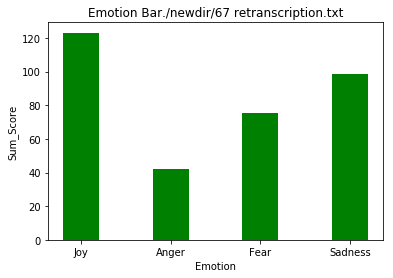

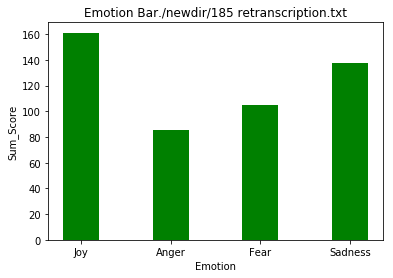

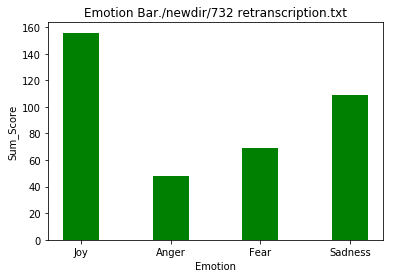

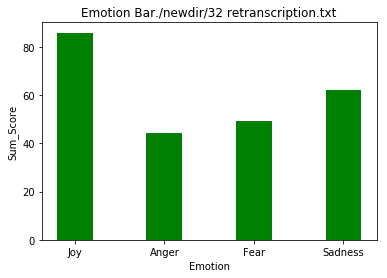

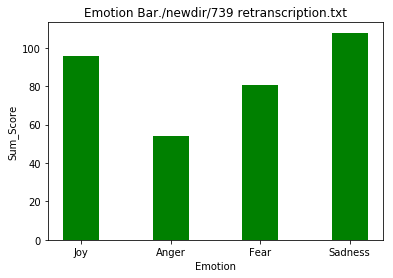

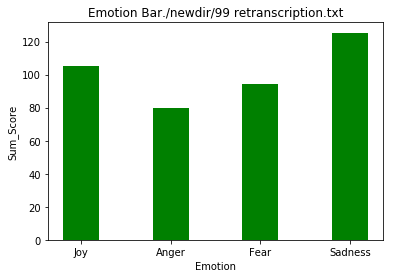

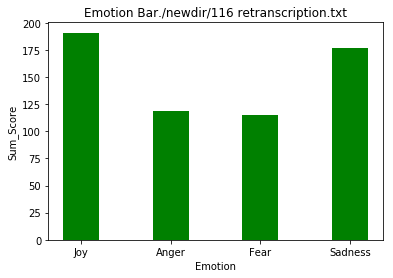

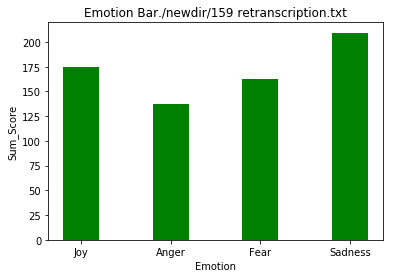

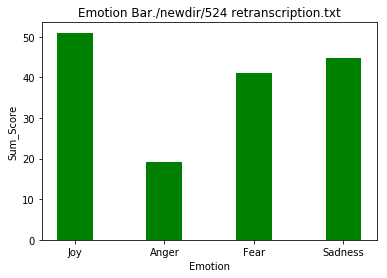

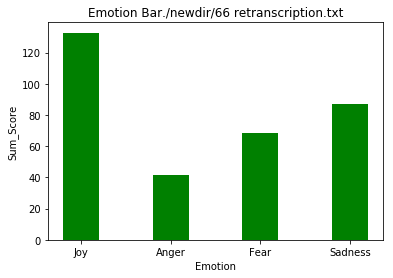

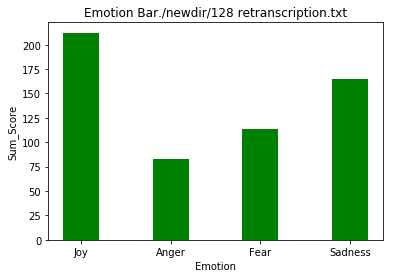

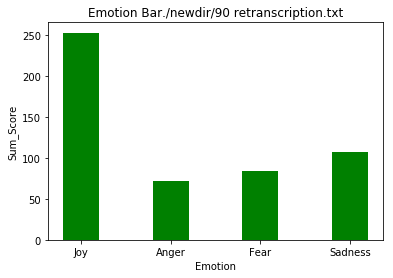

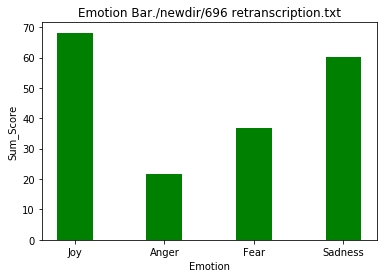

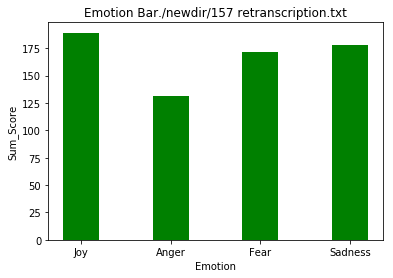

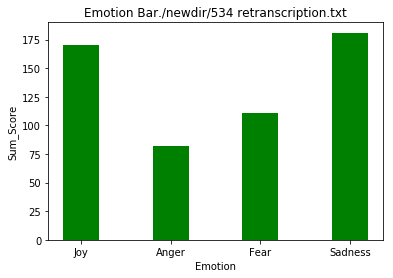

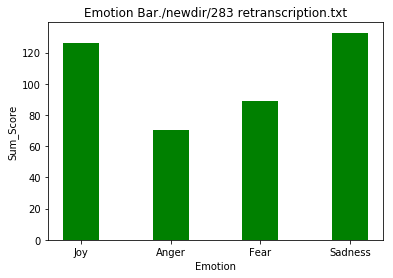

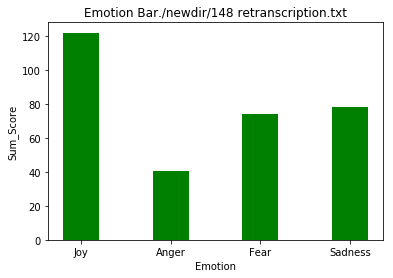

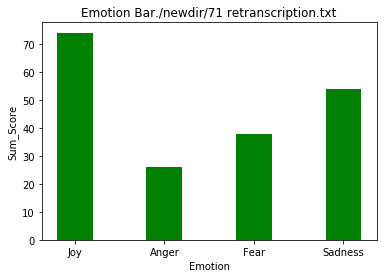

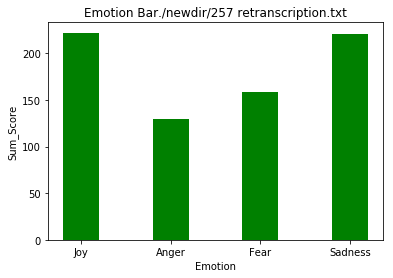

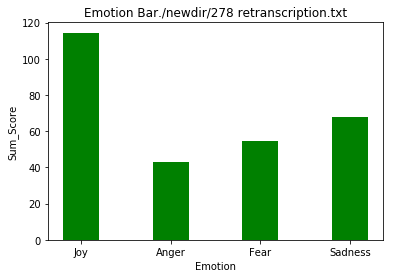

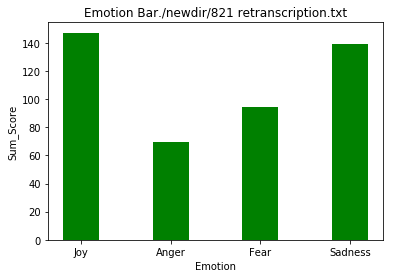

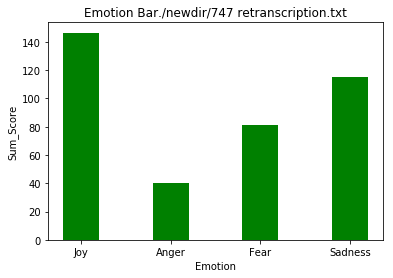

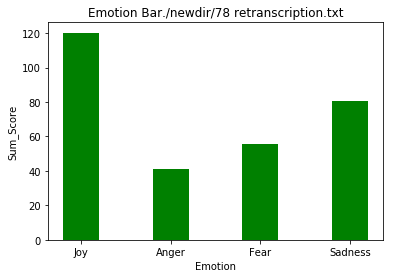

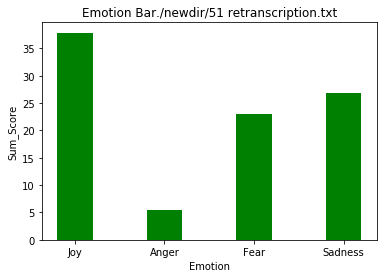

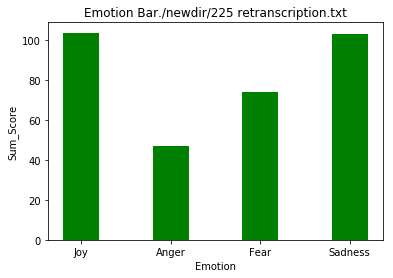

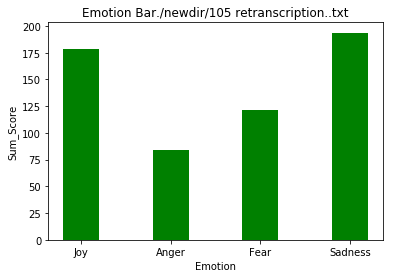

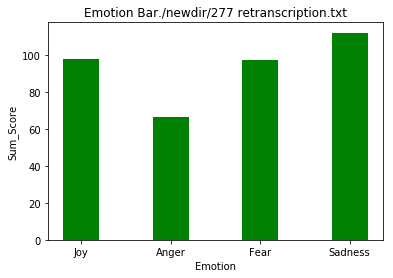

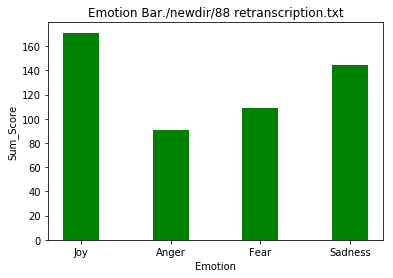

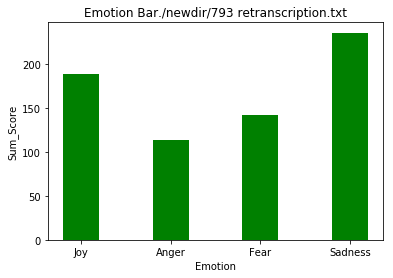

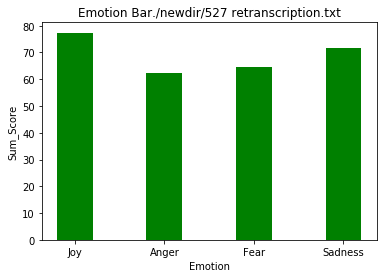

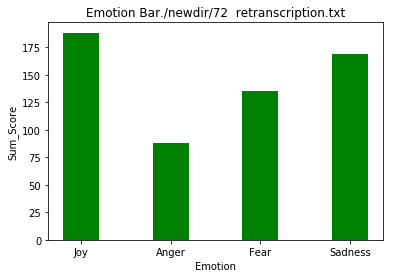

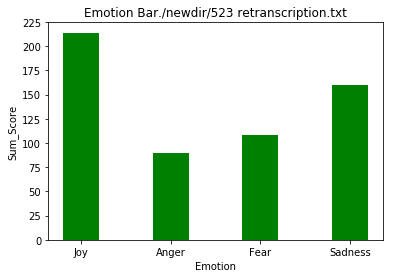

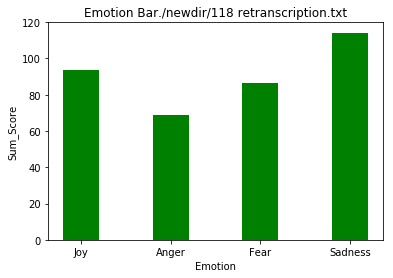

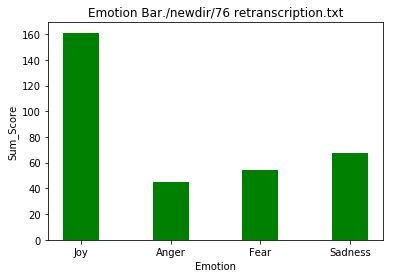

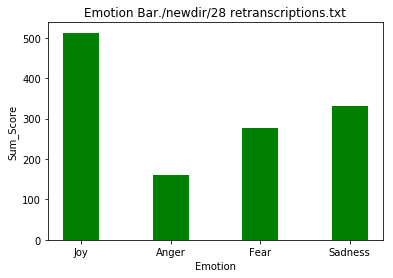

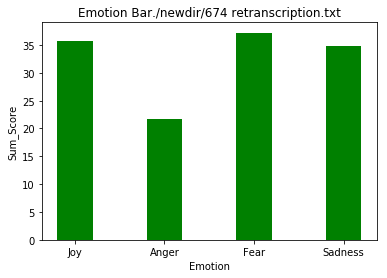

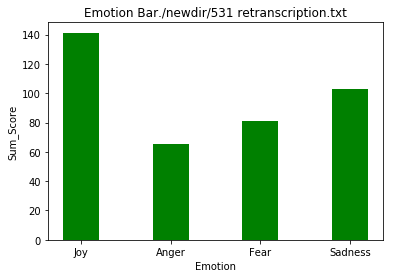

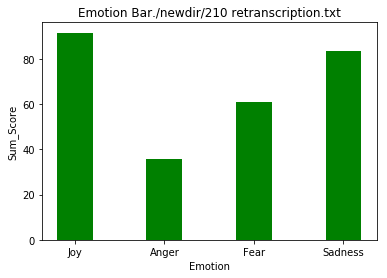

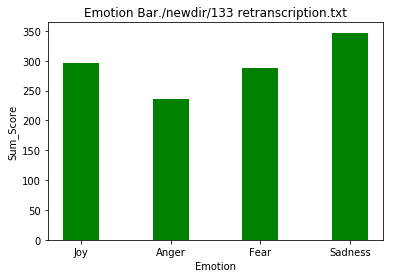

In [45]:
X=['Joy','Anger','Fear','Sadness']
for i in range(np.array(score_anger).shape[0]):
    Y=[score_joy[i][1],score_anger[i][1],score_fear[i][1],score_sadness[i][1]]  
    fig = plt.figure()
    plt.bar(X,Y,0.4,color="green")
    plt.xlabel("Emotion")
    plt.ylabel("Sum_Score")
    plt.title("Emotion Bar"+Paths[i])

plt.show()  

In [58]:
from prettytable import *
table = PrettyTable(['Person','Score_J','Score_A','Score_F','Score_S','Average_J','Average_A','Average_F','Average_S'])
for i in range(np.array(score_anger).shape[0]):
    table.add_row([Paths[i],score_joy[i][1],score_anger[i][1],score_fear[i][1],score_sadness[i][1],score_joy[i][2],score_anger[i][2],score_fear[i][2],score_sadness[i][2]])
print(table)


+-----------------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+
|               Person              |      Score_J       |      Score_A       |      Score_F       |      Score_S       |      Average_J      |      Average_A      |      Average_F      |      Average_S      |
+-----------------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+
|  ./newdir/182 retranscription.txt | 154.55200000000013 | 85.24900000000005  | 134.21099999999987 | 147.21499999999983 |  0.5100726072607266 |  0.5104730538922159 |  0.526317647058823  |  0.4703354632587854 |
|  ./newdir/505 retranscription.txt | 178.92200000000008 | 64.73999999999998  | 79.53500000000001  |       99.245       |  0.5608840125391852 | 0.49799999999999

## AHP Analysis